In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
batch_size = 32
img_height = 331
img_width = 331

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  './data/',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical'
)

Found 1312 files belonging to 4 classes.
Using 1050 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  './data/',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical'
)

Found 1312 files belonging to 4 classes.
Using 262 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['aluminium_foil', 'brick', 'rice', 'stone']


TypeError: only integer scalar arrays can be converted to a scalar index

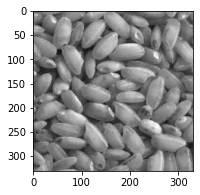

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
import effnetv2_model

In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=[224, 224, 3]),
    effnetv2_model.get_model('efficientnetv2-b3', include_top=False),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4, activation='softmax'),
])

In [29]:
model.compile(
  optimizer=tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9),
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

In [30]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50
33/33 [==============================] - 9s 267ms/step - loss: 1.2849 - accuracy: 0.4095 - val_loss: 1.4808 - val_accuracy: 0.3053

In [37]:
import keras

img = keras.preprocessing.image.load_img(
    './test_samples/stone.jpg', target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

In [38]:
prediction = model(img_array)
score = tf.nn.softmax(prediction[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to brick with a 33.84 percent confidence.


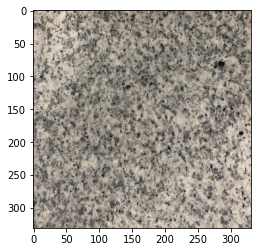

In [39]:
plt.imshow(img)